In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("./Data_File/train.csv")
test_df = pd.read_csv("./Data_File/test.csv")
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Feature**

Passengerld : 승객 번호

Survived : 생존 여부 - 생존시 1 / 사망시 0

Pclass : 객실 등급 - 숫자가 낮을수록 높은 등급의 객실

Name : 이름

Sex : 성별 </br>

Age : 나이 </br>

SibSp : 동반한 형제자매, 배우자 수 </br>

Parch : 동반한 부모, 자식 수

Ticket : 티켓 종류

Fare : 요금

Cabin : 객실 번호

Embarked : 승선 장소 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

**1. PassengerId** </br>

<Axes: >

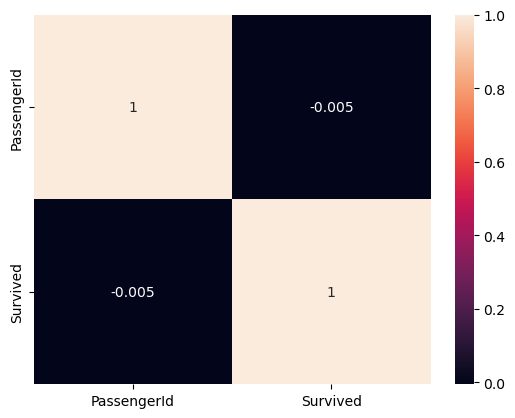

In [4]:
# Checking the correlation

sv_pid = train_df[['PassengerId', 'Survived']]
corr = sv_pid.corr()

sns.heatmap(corr, annot = True)

<Axes: xlabel='Survived', ylabel='PassengerId'>

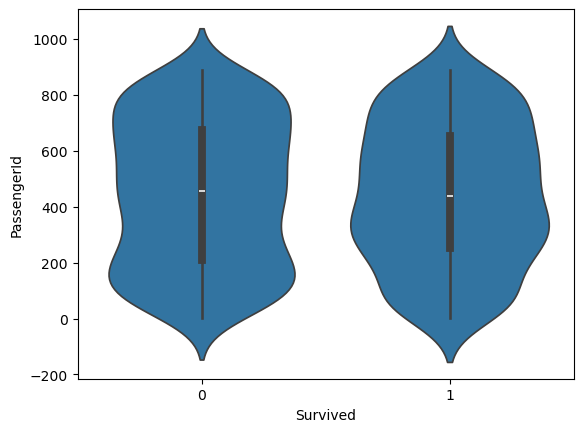

In [5]:
# Checking the violin plot for survived distribuion
sns.violinplot(x = train_df['Survived'], y = train_df['PassengerId'])

상관도도 낮으며 Label과의 유의미한 분포를 찾기 힘듦 </br>

추가적으로 PassengerId라는 feature는 단순 순서를 나타낸 표기로 보이므로 학습에 유의미한 영향을 주지는 않을 것으로 확인</br>
-> drop

**2. Pcalss**

<Axes: >

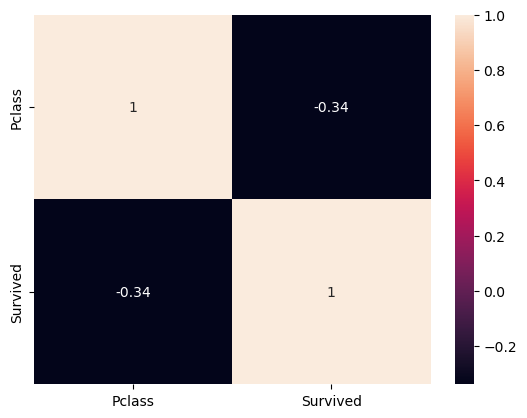

In [6]:
# Checking the correlation

sv_pc = train_df[['Pclass', 'Survived']]
corr = sv_pc.corr()

sns.heatmap(corr, annot = True)

<Axes: xlabel='Pclass', ylabel='Survived'>

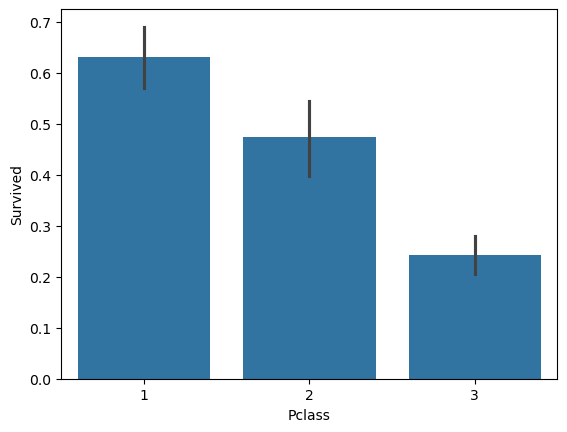

In [7]:
# Checking the violin plot for survived mean distribuion
sns.barplot(y = train_df['Survived'], x = train_df['Pclass'])

유의미한 상관도와 Pclass에 따른 생존률이 눈에 뛰게 차이가 남 </br>

Pclass feature는 category성으로 Encoding이 필요함 </br>

1\. Label Encoding / 2\. OneHot Encoding </br>
(단, Pclass 값 자체가 1, 2, 3으로 나누어져 있으므로, 별도의 Label Encoding 작업은 필요하지 않음)

**3. Name** </br></br>
csv파일을 확인한 결과 feature 데이터는 ' 이름, 호칭 성 (기혼 여성일 시 기존 성) ' 의 형식을 띄우고 있다. </br>

생각해볼 가능성</br>

1\. 호칭에 따른 결과 - Mr, Mrs, Miss, Master, . . . </br>
2\. 성씨(가문)에 따른 결과

1번

In [8]:
# Transforming train data Name to Title
Title_list_train = list()
for str in train_df['Name']:
    str1 = str.split(', ')[1]
    str2 = str1.split('.')[0]
    Title_list_train.append(str2)

title_version_train = train_df.copy(deep = True)

title_version_train['Title'] = Title_list_train
title_version_train.drop('Name', axis = 1, inplace = True)

In [9]:
# Checking value_counts of train data
title_version_train['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [10]:
# Transforming test data Name to Title
Title_list_test = list()
for str in test_df['Name']:
    str1 = str.split(', ')[1]
    str2 = str1.split('.')[0]
    Title_list_test.append(str2)

title_version_test = test_df.copy(deep = True)

title_version_test['Title'] = Title_list_test
title_version_test.drop('Name', axis = 1, inplace = True)

In [11]:
# Checking value_counts of train data
title_version_test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [12]:
# drop some title_version_train index except which are in title_version_test
drop_title = ['Mlle', 'Major', 'the Countess', 'Capt', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer']
drop_index = list()
for title in drop_title:
    index = title_version_train[title_version_train['Title'] == title].index.tolist()
    drop_index.append(index)
    
drop_index = sum(drop_index,[])

title_version_train.drop(drop_index, axis = 0, inplace = True)

In [13]:
title_version_train['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
Rev         6
Col         2
Ms          1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='Survived'>

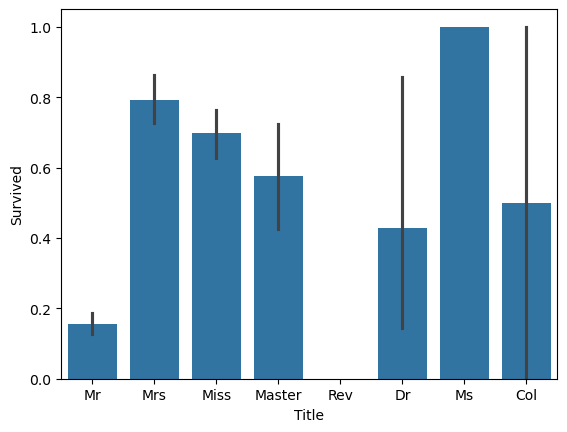

In [14]:
sns.barplot(x = title_version_train['Title'], y= title_version_train['Survived'])

호칭에 따른 유의미한 생존율의 차이를 보여준다. 특히 가장 수가 많은 Mr이지만, 오히려 생존율은 뒤에서 2 번째 일정도로 낮다</br>

2번

In [15]:
# Transforming train data Name to Family
Family_list_train = list()
for str in train_df['Name']:
    str1 = str.split(', ')[1]
    str2 = str1.split('. ')[1]
    if '(' in str2:
        str3 = str2.split(' (')[0]
        Family_list_train.append(str3)
    else:
        Family_list_train.append(str2)

Family_version_train = train_df.copy(deep = True)

Family_version_train['Family'] = Family_list_train
Family_version_train.drop('Name', axis = 1, inplace = True)

In [16]:
# Checking value_counts of train data
Family_version_train['Family'].value_counts()

Family
William                11
John                   10
James                   9
Mary                    6
Joseph                  5
                       ..
Howard Hugh "Harry"     1
Hudson Trevor           1
Margaret                1
Laura Mabel             1
Karl Howell             1
Name: count, Length: 729, dtype: int64

In [17]:
# Checking the number of unique values
print("Number of unique values : ", Family_version_train['Family'].nunique())

Number of unique values :  729


유의미한 카테고리를 가지지 못하므로, 가문을 기준으로 분류는 하지 않는 것으로 한다

Name은 Title를 기준으로 변경하는 것이 좋은 방안으로 보이며 </br>

category성으로 Label Encoding 혹은 OneHot Encoding을 적용시킨다

**4. Sex**

<Axes: xlabel='Sex', ylabel='Survived'>

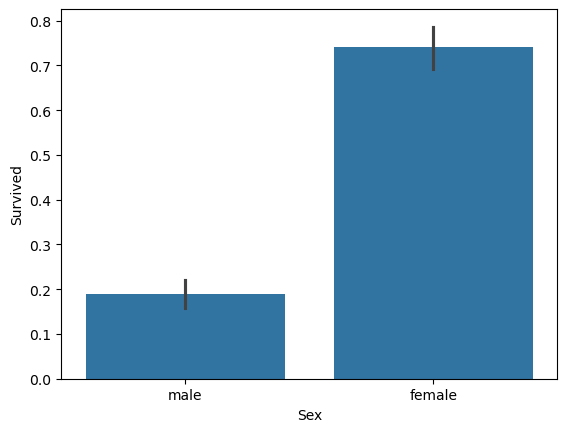

In [18]:
# Checking the survived mean distribution
sns.barplot(x = train_df['Sex'], y = train_df['Survived'])

In [19]:
# Checking the value counts()
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
# Checking the number by group
sex_group = train_df.groupby(['Survived', 'Sex'])
sex_group['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

전체 수는 male이 더 많지만, 사망자 생존자의 격차가 크게 나타나는 유의미한 feature로 확인 </br>

category성 데이터로 Label Encoding 혹은 OneHot Encoding 적용

**5. Age**

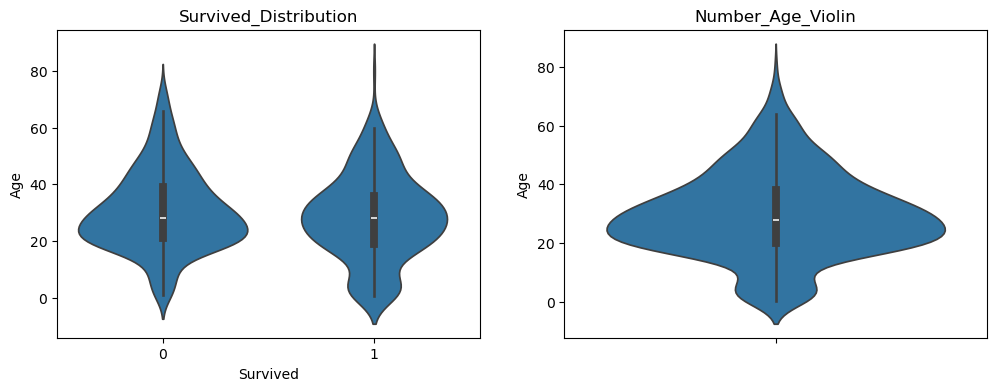

In [21]:
# Checking the distribution graph ver
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

sns.violinplot(y = train_df['Age'], x = train_df['Survived'],ax = ax[0])
sns.violinplot(y=train_df['Age'], ax = ax[1])

ax[0].set_title('Survived_Distribution')
ax[1].set_title('Number_Age_Violin')

plt.show()

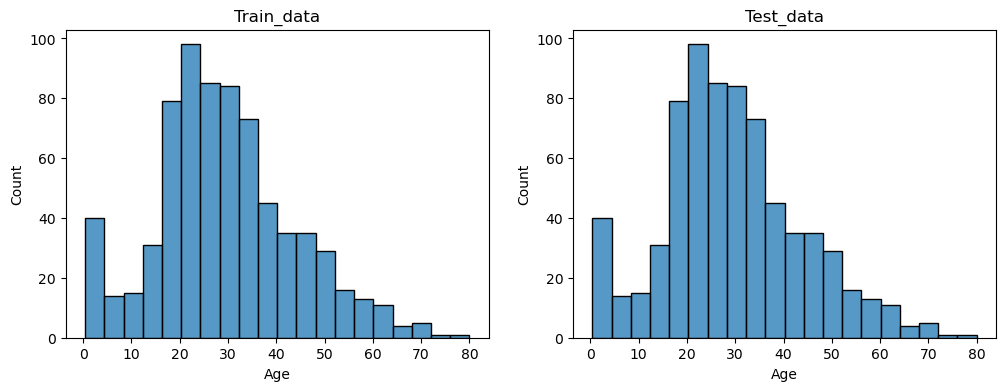

In [22]:
# Cheking the Age distribution
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

sns.histplot(x=train_df['Age'], ax = ax[0])
sns.histplot(x=train_df['Age'], ax = ax[1])

ax[0].set_title('Train_data')
ax[1].set_title('Test_data')

plt.show()

In [23]:
# Divide Age into 9 selections
def Age_Conversion(age):
    title = ''
    if age <= 5:
        title = 'Baby'
    elif age <= 10:
        title = 'Baby_Child'
    elif age <= 16:
        title = 'Child'
    elif age <= 28:
        title = 'Young_Adult'
    elif age <= 36:
        title = 'OB'
    elif age <= 44:
        title = 'Adult'
    elif age <= 52:
        title = 'Old_Adult'
    elif age <= 64:
        title = 'Senior'
    else:
        title = 'Grand'

    return title
        

In [24]:
# Transforming Age to selection_ver
Age_version_train = train_df.copy(deep = True)

Age_version_train['Age_selection'] = train_df['Age'].apply(lambda x : Age_Conversion(x))
Age_version_train.drop('Age', axis = 1, inplace = True)

Age_version_test = test_df.copy(deep = True)

Age_version_test['Age_selection'] = test_df['Age'].apply(lambda x : Age_Conversion(x))
Age_version_test.drop('Age', axis = 1, inplace = True)

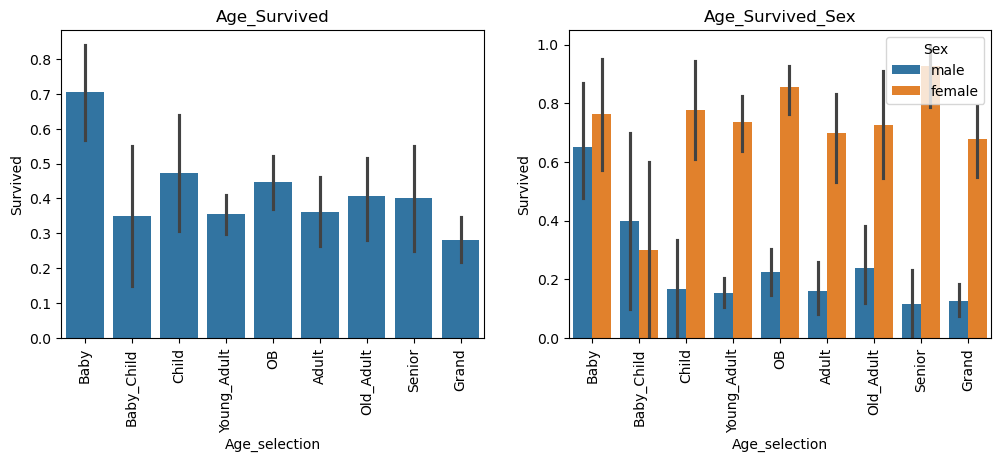

In [60]:
import warnings
warnings.filterwarnings(action='ignore')

# Checking survived mean distribution
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

Age_list = ['Baby', 'Baby_Child', 'Child', 'Young_Adult', 'OB', 'Adult', 'Old_Adult', 'Senior', 'Grand']

sns.barplot(x = Age_version_train['Age_selection'], y = Age_version_train['Survived'],ax = ax[0], order = Age_list)
sns.barplot(x = Age_version_train['Age_selection'], y = Age_version_train['Survived'], hue = Age_version_train['Sex'], ax = ax[1], order = Age_list)

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

ax[0].set_title('Age_Survived')
ax[1].set_title('Age_Survived_Sex')

plt.show()

Selection 결과 성별로 breakdown한 barplot을 보면 특정 나이대에서 유의미한 수치가 나오는 것을 볼 수 있다</br>

Age를 그대로 사용해도 되며, Selection형태로 사용해도 된다 - 분류에 있어 selection형태가 더 좋은 성능이 기대된다</br>

만약 Selection형태로 사용하게 된다면 category성이므로 Encoding을 적용 시킨다

**6. SibSp, Parch**

<Axes: >

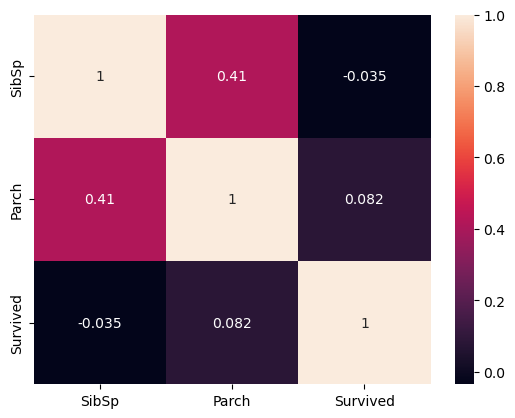

In [26]:
# Checking the correlation
corr = train_df[['SibSp', 'Parch', 'Survived']].corr()
sns.heatmap(corr, annot = True)

In [27]:
# Checking value_counts
print("Train Data")
print(train_df['SibSp'].value_counts())
print("-"*40)
print(train_df['Parch'].value_counts())
print("\n\n")
print("Test Data")
print(test_df['SibSp'].value_counts())
print("-"*40)
print(test_df['Parch'].value_counts())

Train Data
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
----------------------------------------
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64



Test Data
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64
----------------------------------------
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64


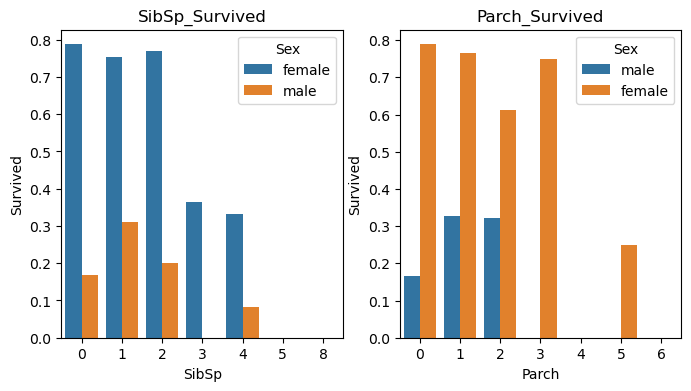

In [28]:
# Checking survived mean distribution
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))

order_list = ['male', 'female']

sns.barplot( x = 'SibSp', y = 'Survived', data = train_df, ax = ax[0], errorbar = None, hue = 'Sex')
sns.barplot( x = 'Parch', y = 'Survived', data = train_df, ax = ax[1], errorbar = None, hue = 'Sex')

ax[0].set_title('SibSp_Survived')
ax[1].set_title("Parch_Survived")

plt.show()

In [29]:
# Checking survived num groupby
SibSp_group = train_df.groupby(['Survived', 'SibSp', 'Sex'])
Parch_group = train_df.groupby(['Survived', 'Parch', 'Sex'])

print(SibSp_group['Survived'].count())
print("-"*50)
print(Parch_group['Survived'].count())

Survived  SibSp  Sex   
0         0      female     37
                 male      361
          1      female     26
                 male       71
          2      female      3
                 male       12
          3      female      7
                 male        5
          4      female      4
                 male       11
          5      female      1
                 male        4
          8      female      3
                 male        4
1         0      female    137
                 male       73
          1      female     80
                 male       32
          2      female     10
                 male        3
          3      female      4
          4      female      2
                 male        1
Name: Survived, dtype: int64
--------------------------------------------------
Survived  Parch  Sex   
0         0      female     41
                 male      404
          1      female     14
                 male       39
          2      female     19
    

In [30]:
# Combine feature SibSp and Parch to Family
Family_ver = train_df.copy(deep = True)

Family_ver['Family'] = Family_ver['SibSp'] + Family_ver['Parch']
Family_ver.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

test_F_ver = test_df.copy(deep = True)
test_F_ver['Family'] = test_F_ver['SibSp'] + test_F_ver['Parch']
test_F_ver.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

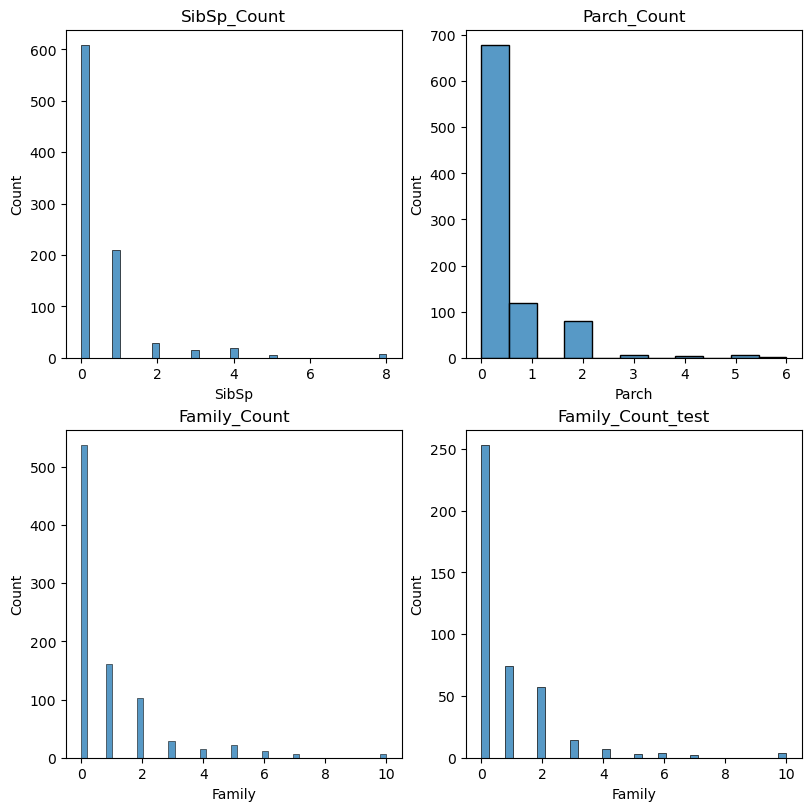

In [31]:
# Checking num distribution
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8), constrained_layout=True)

sns.histplot(x = train_df['SibSp'], ax = ax[0][0])
sns.histplot(x = train_df['Parch'], ax = ax[0][1])
sns.histplot(x = Family_ver['Family'], ax = ax[1][0])
sns.histplot(x = test_F_ver['Family'], ax = ax[1][1])

ax[0][0].set_title('SibSp_Count')
ax[0][1].set_title('Parch_Count')
ax[1][0].set_title('Family_Count')
ax[1][1].set_title('Family_Count_test')

plt.show()

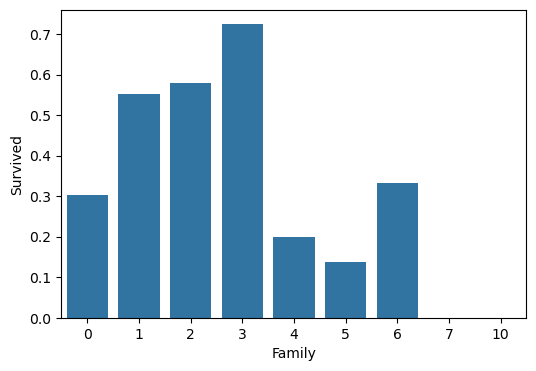

In [32]:
# Checking survived mean distribution
plt.figure(figsize = (6,4))
sns.barplot(x = 'Family', y = 'Survived', data = Family_ver, errorbar = None)
plt.show()

SibSp과 Parch는 서로 연관도가 높은데, 이는 하나의 가족이기 때문이라고 볼 수 있다 </br>

예를 들면, 가족 여행을 간다 하였을 때 부모와 자식들 뿐만 아니라 대가족 형태라면 SibSp과 Parch를 모두 가지게 된다 </br>

이렇게 된다면 데이터 상 train, test 모두 둘의 형상이 크게 다르지 않기에 Family라는 하나의 feature로 묶어서 사용하는 것이 가능하다고 파악된다

**7. Ticket**

In [33]:
# Checking value counts
train_df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

csv 파일 확인 결과 특정한 규칙을 찾아내기 어려움 </br>

또한 unique의 수가 너무 많아 category처리도 불가능 </br>
-> drop

**8. Fare**

<Axes: >

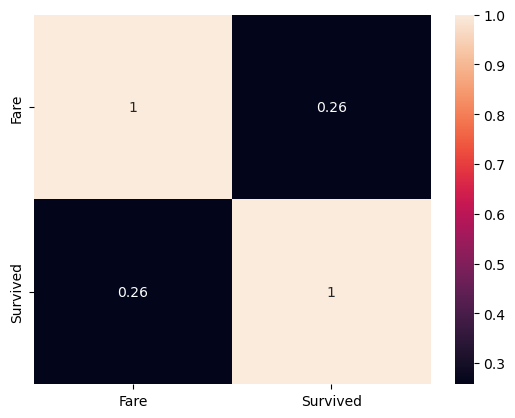

In [34]:
# Checking correlation
corr = train_df[['Fare', 'Survived']].corr()

sns.heatmap(corr, annot = True)

<Axes: xlabel='Survived', ylabel='Fare'>

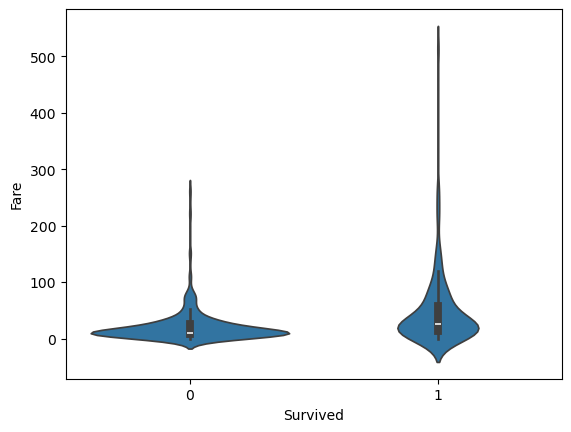

In [35]:
# Checking violin survived distribution
sns.violinplot(x = train_df['Survived'], y = train_df['Fare'])

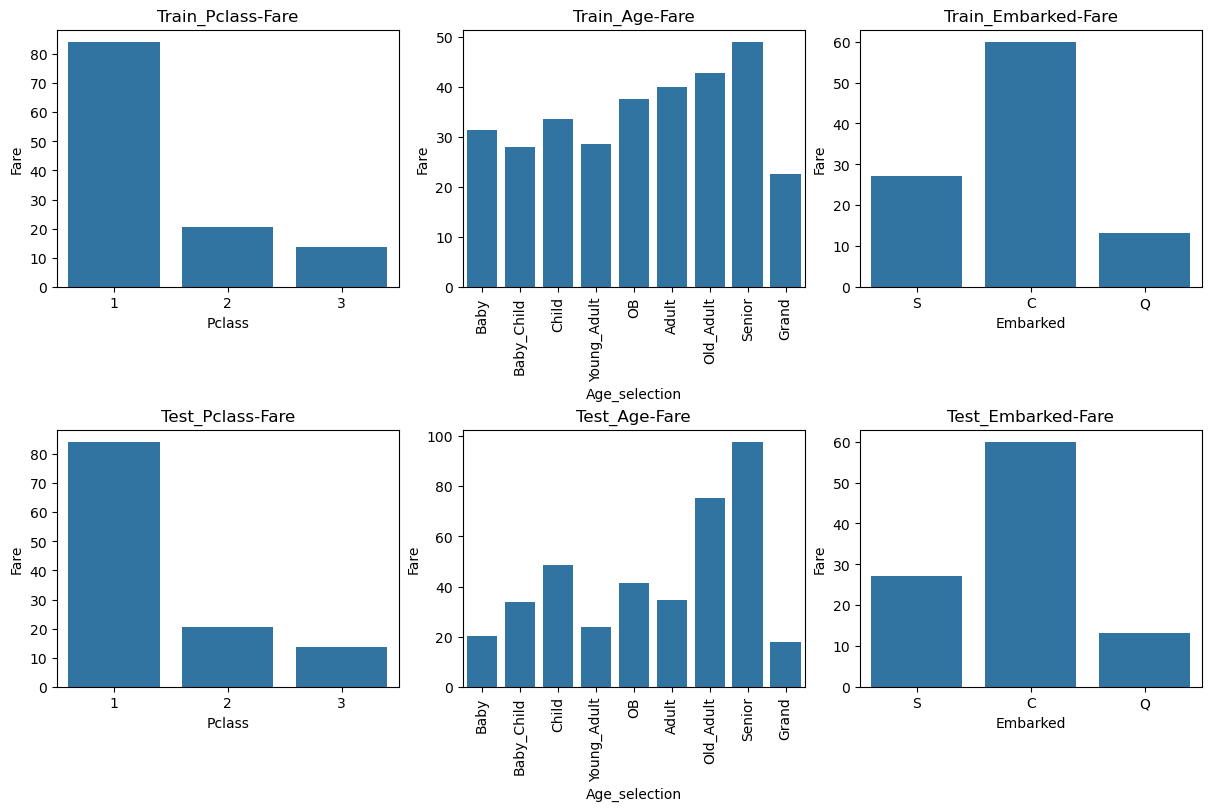

In [61]:
import warnings
warnings.filterwarnings(action='ignore')

# Checking rating with other features
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12,8), constrained_layout=True)

Age_list = ['Baby', 'Baby_Child', 'Child', 'Young_Adult', 'OB', 'Adult', 'Old_Adult', 'Senior', 'Grand']

sns.barplot(x = 'Pclass', y = 'Fare', data = train_df, ax = ax[0][0], errorbar = None)
sns.barplot(x = 'Age_selection', y = 'Fare', data = Age_version_train, ax = ax[0][1], errorbar = None, order = Age_list)
sns.barplot(x = 'Embarked', y = 'Fare', data = train_df, ax = ax[0][2], errorbar = None)
sns.barplot(x = 'Pclass', y = 'Fare', data = train_df, ax = ax[1][0], errorbar = None)
sns.barplot(x = 'Age_selection', y = 'Fare', data = Age_version_test, ax = ax[1][1], errorbar = None, order = Age_list)
sns.barplot(x = 'Embarked', y = 'Fare', data = train_df, ax = ax[1][2], errorbar = None)

ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation = 90)
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation = 90)

ax[0][0].set_title('Train_Pclass-Fare')
ax[0][1].set_title('Train_Age-Fare')
ax[0][2].set_title('Train_Embarked-Fare')
ax[1][0].set_title('Test_Pclass-Fare')
ax[1][1].set_title('Test_Age-Fare')
ax[1][2].set_title('Test_Embarked-Fare')

plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

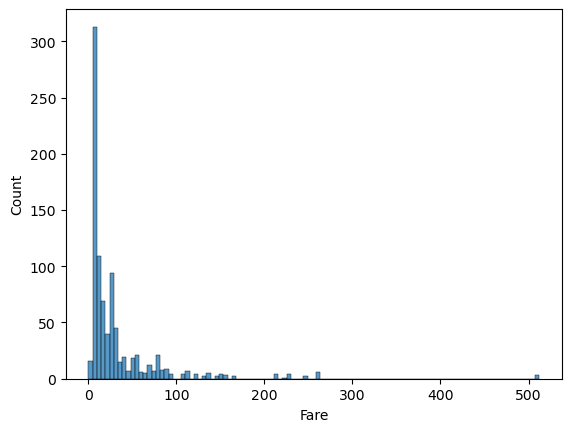

In [37]:
# Checking fare distribution
sns.histplot(x = train_df['Fare'])

<Axes: xlabel='Fare', ylabel='Count'>

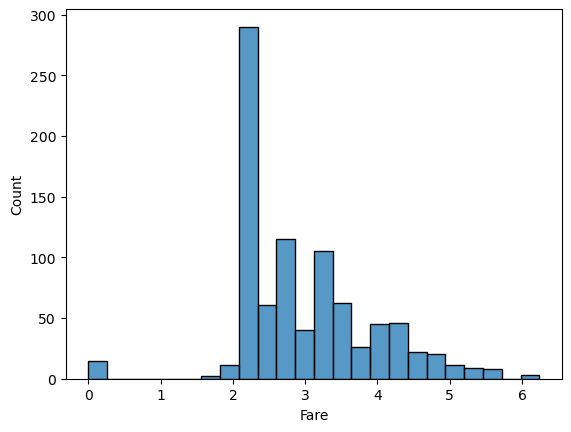

In [38]:
# Log conversion
log_fare = np.log1p(train_df['Fare'])
log_version = train_df.copy(deep = True)
log_version['Fare'] = log_fare
sns.histplot(x = log_version['Fare'])

<Axes: xlabel='Survived', ylabel='Fare'>

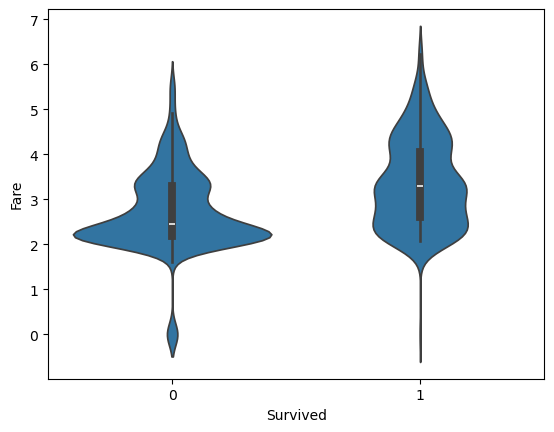

In [39]:
# Checking violin survived distribution of log version
sns.violinplot(x = log_version['Survived'], y = log_version['Fare'])

Fare는 특성에 맞게 다른 feature과 유의미한 관계를 가지는 것으로 보인다 </br>

하지만, 예상외로 Age랑은 크게 연관은 없는 것으로 파악된다 </br>

그리고 또한 Embarked에서 탑승지가 C인 곳은 Fare가 높은 것으로 보아 C에서 출발하는 가격은 비싼 것으로 보인다 (여행 거리가 긴다든 지)</br></br>


분포를 확인한 결과 Right skwe를 확인 가능한데, 이때 log 변환을 통해 분포를 변환시키면 violinplot으로 보았을 때, Fare에 따른 생존율이 좀 더 직관적으로 파악 가능해진다 </br>

따라서 log 변환을 할 시 모델이 분류하는 것에 좀 더 도움을 줄 수 있는 것으로 파악

**9. Cabin**

In [40]:
# Checking value_counts
train_df['Cabin'].value_counts(dropna = False)

Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64
----------------------------------------


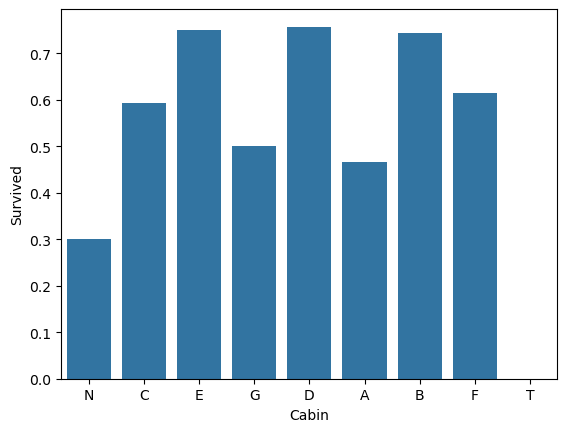

In [41]:
# Just using Alphabet of Cabin
cabin_version = train_df.copy(deep = True)
cabin_version['Cabin'] = cabin_version['Cabin'].fillna('N')

new_cabin = list()
for str in cabin_version['Cabin']:
    new_cabin.append(str[0])
    
cabin_version['Cabin'] = new_cabin
print(cabin_version['Cabin'].value_counts())
print("-"*40)

sns.barplot(x = 'Cabin', y = 'Survived', data = cabin_version, errorbar = None)
plt.show()

In [42]:
# Checking test data
cabin_version_test = test_df.copy(deep = True)
cabin_version_test['Cabin'] = cabin_version_test['Cabin'].fillna('N')

new_cabin = list()
for str in cabin_version_test['Cabin']:
    new_cabin.append(str[0])
    
cabin_version_test['Cabin'] = new_cabin
print(cabin_version_test['Cabin'].value_counts())

Cabin
N    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: count, dtype: int64


NaN값이 너무 많아서 사용하기에 애매한 부분이 존재 </br>

충돌 시간은 늦은 23시 40분경이었기에, 호실에 따른 탈출 속도가 다를 수 있다고 생각이 됨</br>

이 feature을 사용한다면 category성이므로 Encoding을 적용시키며, 성능 하락이 예상된다면 drop </br>

csv파일을 봤을 때, 한 명이 여러 방을 구매한 경우도 많음</br>

가족 단위일 시 1명의 이름으로 예약을 하므로 이게 반영되어 NaN이 많은 걸로 추정이 되며 drop하는 것이 좋을 듯 함

**10. Embarked**

<Axes: xlabel='Embarked', ylabel='Survived'>

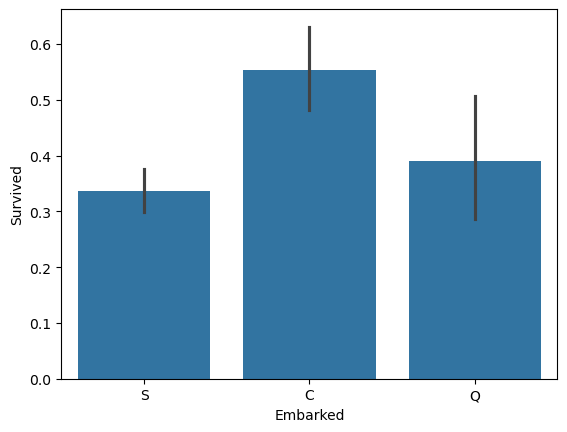

In [43]:
# Checking survived mean distribution
sns.barplot(x = train_df['Embarked'], y = train_df['Survived'])

가격은 S가 Q보다 비싼 것으로 확인 되었는데, 생존율은 Q가 더 높다 </br>

이는 위치와 관련이 있는 것으로 보이며 이는 Cabin이 Embarked에 따라 배정되었을 것이라는 추측 가능</br>

탑승지에 따른 Fare와 Survived 관계가 유의미하므로 feature에 포함 시키며 </br>

category성 데이터이므로 Encoding을 적용시킨다

### **Null Data Processing**

**Drop feature**

In [44]:
def delete_feature(df):
    drop_list = ['PassengerId', 'Ticket', 'Cabin']
    for drop_ele in drop_list:
        df.drop(drop_ele, axis = 1, inplace = True)

In [45]:
delete_feature(train_df)
delete_feature(test_df)

**Remove NaN Values**

In [46]:
# Checking the info
print(train_df.info())
print("-"*40)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 n

Null Value가 있는 feaure : Age, Embarked, Fare

<Axes: >

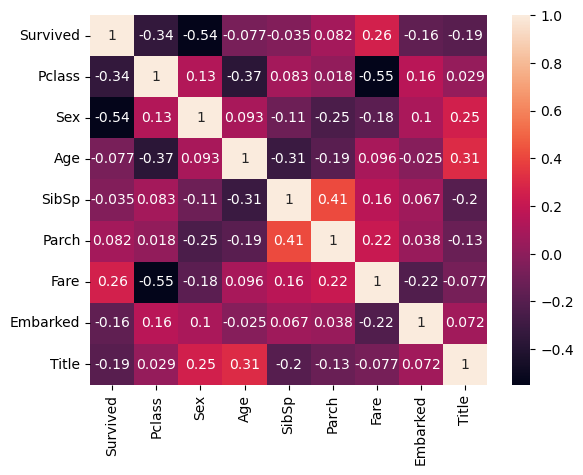

In [47]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for_NaN = train_df.copy(deep = True)

# Label Encoding Name
Title_list = list()
for str in train_df['Name']:
    str1 = str.split(', ')[1]
    str2 = str1.split('.')[0]
    Title_list.append(str2)

for_NaN['Title'] = Title_list
for_NaN.drop('Name', axis = 1, inplace = True)
Label_title = label.fit_transform(for_NaN['Title'])
for_NaN['Title'] = Label_title

# Label Encoding Sex
Label_sex = label.fit_transform(train_df['Sex'])
for_NaN['Sex'] = Label_sex

# Label Encoding Embarked
Label_embarked = label.fit_transform(train_df['Embarked'])
for_NaN['Embarked'] = Label_embarked

# Cheking the correlation
corr = for_NaN.corr()
sns.heatmap(corr, annot = True)

<Axes: xlabel='Pclass', ylabel='Age'>

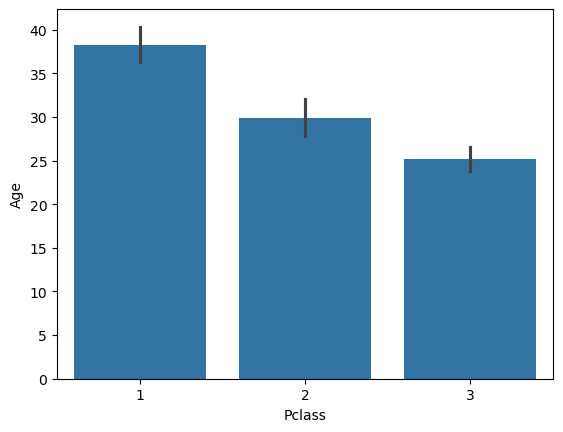

In [48]:
# Age-Pclass
sns.barplot(x = train_df['Pclass'], y = train_df['Age'])

In [63]:
# Fill train Age NaN with mean by Pclass

NaN_df = train_df.copy(deep = True)

index_list = NaN_df[NaN_df.isna() == 1].index.tolist()
for index in index_list:
    Pclass = NaN_df[NaN_df.index == index]['Pclass'].values.tolist()[0]
    if Pclass == 1:
        NaN_df['Age'][index] = NaN_df[NaN_df['Pclass'] == 1].loc[:,'Age'].mean()
    elif Pclass == 2:
        NaN_df['Age'][index] = NaN_df[NaN_df['Pclass'] == 2].loc[:,'Age'].mean()
    else:
        NaN_df['Age'][index] = NaN_df[NaN_df['Pclass'] == 3].loc[:,'Age'].mean()


In [62]:
NaN_df['Age'][3]

38.23469591860331

In [64]:
# Fill train Embarked by Fare
#NaN_df[NaN_df['Embarked'].isna() == 1].index.tolist()
#result = 61, 829

#NaN_df['Fare'].iloc[61]
#result = 80

#NaN_df['Fare'].iloc[829]
#result = 80

#replace NaN to 'C'

NaN_df ['Embarked'] = NaN_df['Embarked'].fillna('C')

In [65]:
NaN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [66]:
# Fill test Age by Pclass
#import warnings
#warnings.filterwarnings(action = 'ignore')

NaN_test = test_df.copy(deep = True)

index_list = NaN_test[NaN_test.isna() == 1].index.tolist()
for index in index_list:
    Pclass = NaN_test[NaN_test.index == index]['Pclass'].values.tolist()[0]
    if Pclass == 1:
        NaN_test['Age'][index] = NaN_test[NaN_test['Pclass'] == 1].loc[:,'Age'].mean()
    elif Pclass == 2:
        NaN_test['Age'][index] = NaN_test[NaN_test['Pclass'] == 2].loc[:,'Age'].mean()
    else:
        NaN_test['Age'][index] = NaN_test[NaN_test['Pclass'] == 3].loc[:,'Age'].mean()


In [67]:
# Fill test Fare by Embarked

#NaN_test[NaN_test['Fare'].isna()==1].index
#result = 152

#NaN_test['Embarked'].iloc[152]
#result = 'S'

#fare_group = NaN_test.groupby(['Embarked'])
#fare_group['Fare'].mean()
#result = 28.230436

NaN_test['Fare'][152] = 28.230436

In [54]:
NaN_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


### **Make Functions**

In [55]:
a = train_df.copy(deep = True)
b = test_df.copy(deep = True)

**Delete features**

In [56]:
def delete_features(df):
    feature_list = ['PassengerId', 'Ticket', 'Cabin']
    df.drop(feature_list, axis = 1, inplace = True)

**Fill NaN**

In [80]:
def fill_NaN_train(df):
    index_list = df[df.isna() == 1].index.tolist()
    for index in index_list:
        Pclass = df[df.index == index]['Pclass'].values.tolist()[0]
        if Pclass == 1:
            df['Age'][index] = df[df['Pclass'] == 1].loc[:,'Age'].mean()
        elif Pclass == 2:
            df['Age'][index] = df[df['Pclass'] == 2].loc[:,'Age'].mean()
        else:
            df['Age'][index] = df[df['Pclass'] == 3].loc[:,'Age'].mean()

    df['Embarked'] = df['Embarked'].fillna('C')


def fill_NaN_test(df):
    index_list = df[df.isna() == 1].index.tolist()
    for index in index_list:
        Pclass = df[df.index == index]['Pclass'].values.tolist()[0]
        if Pclass == 1:
            df['Age'][index] = df[df['Pclass'] == 1].loc[:,'Age'].mean()
        elif Pclass == 2:
            df['Age'][index] = df[df['Pclass'] == 2].loc[:,'Age'].mean()
        else:
            df['Age'][index] = df[df['Pclass'] == 3].loc[:,'Age'].mean()
            
    df['Fare'][152] = 28.230436

**Name Engineering**

In [58]:
def Name_Engineering_train(df):
    Title_list = list()
    for str in df['Name']:
        str1 = str.split(', ')[1]
        str2 = str1.split('.')[0]
        Title_list.append(str2)

    df['Title'] = Title_list
    drop_title = ['Mlle', 'Major', 'the Countess', 'Capt', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer']
    drop_index = list()
    for title in drop_title:
        index = df[df['Title'] == title].index.tolist()
        drop_index.append(index)
    drop_index = sum(drop_index,[])
    df.drop(drop_index, axis = 0, inplace = True)
    
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    new_title = label.fit_transform(df['Title'])
    df['Title'] = new_title
    df.drop('Name', axis = 1, inplace = True)


def Name_Engineering_test(df):
    Title_list = list()
    for str in df['Name']:
        str1 = str.split(', ')[1]
        str2 = str1.split('.')[0]
        Title_list.append(str2)
        
    # Dona index = 414 change Dona to ZDona for last labeling (not in train set)
    Title_list[414] = 'ZDona'
    
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    new_title = label.fit_transform(Title_list)
    df['Title'] = new_title
    df.drop('Name', axis = 1, inplace = True)

**Sex Encoding**

In [59]:
def Sex_Encoding(df):
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    new_sex = label.fit_transform(df['Sex'])
    df['Sex'] = new_sex

**Age Engineering**

In [69]:
def Age_Engineering(df):
    def Age_Conversion(age):
        title = ''
        if age <= 5:
            title = 'Baby'
        elif age <= 10:
            title = 'Baby_Child'
        elif age <= 16:
            title = 'Child'
        elif age <= 28:
            title = 'Young_Adult'
        elif age <= 36:
            title = 'OB'
        elif age <= 44:
            title = 'Adult'
        elif age <= 52:
            title = 'Old_Adult'
        elif age <= 64:
            title = 'Senior'
        else:
            title = 'Grand'

        return title

    df['Age_selection'] = df['Age'].apply(lambda x : Age_Conversion(x))
    df.drop('Age', axis = 1, inplace = True)

    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    new_age = label.fit_transform(df['Age_selection'])
    df['Age_selection'] = new_age

**Family Conversion**

In [70]:
def Family_Conversion(df):
    df['Family'] = df['SibSp'] + df['Parch']
    df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

**Fare Log Conversion**

In [71]:
def Fare_Log(df):
    df['Fare'] = np.log1p(df['Fare'])

**Embarked Encoding**

In [72]:
def Embarked_Encoding(df):
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    new_embarked = label.fit_transform(df['Embarked'])
    df['Embarked'] = new_embarked

**Combined Cell**

In [77]:
# Remove features that won't be used to make model
def delete_features(df):
    feature_list = ['PassengerId', 'Ticket', 'Cabin']
    df.drop(feature_list, axis = 1, inplace = True)


# Fill Null Value at train data
def fill_NaN_train(df):
    index_list = df[df.isna() == 1].index.tolist()
    for index in index_list:
        Pclass = df[df.index == index]['Pclass'].values.tolist()[0]
        if Pclass == 1:
            df['Age'][index] = df[df['Pclass'] == 1].loc[:,'Age'].mean()
        elif Pclass == 2:
            df['Age'][index] = df[df['Pclass'] == 2].loc[:,'Age'].mean()
        else:
            df['Age'][index] = df[df['Pclass'] == 3].loc[:,'Age'].mean()

    df['Embarked'] = df['Embarked'].fillna('C')

# Fill Null Value at train test
def fill_NaN_test(df):
    index_list = df[df.isna() == 1].index.tolist()
    for index in index_list:
        Pclass = df[df.index == index]['Pclass'].values.tolist()[0]
        if Pclass == 1:
            df['Age'][index] = df[df['Pclass'] == 1].loc[:,'Age'].mean()
        elif Pclass == 2:
            df['Age'][index] = df[df['Pclass'] == 2].loc[:,'Age'].mean()
        else:
            df['Age'][index] = df[df['Pclass'] == 3].loc[:,'Age'].mean()
            
    df['Fare'][152] = 28.230436


# Extract title from Name, remove titles that not exist in test data and do encoding at train data
def Name_Engineering_train(df):
    Title_list = list()
    for str in df['Name']:
        str1 = str.split(', ')[1]
        str2 = str1.split('.')[0]
        Title_list.append(str2)

    df['Title'] = Title_list
    drop_title = ['Mlle', 'Major', 'the Countess', 'Capt', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer']
    drop_index = list()
    for title in drop_title:
        index = df[df['Title'] == title].index.tolist()
        drop_index.append(index)
    drop_index = sum(drop_index,[])
    df.drop(drop_index, axis = 0, inplace = True)
    
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    new_title = label.fit_transform(df['Title'])
    df['Title'] = new_title
    df.drop('Name', axis = 1, inplace = True)

# Extract title from Name and do encoding at test data
def Name_Engineering_test(df):
    Title_list = list()
    for str in df['Name']:
        str1 = str.split(', ')[1]
        str2 = str1.split('.')[0]
        Title_list.append(str2)
        
    # Dona index = 414 change Dona to ZDona for last labeling (not in train set)
    Title_list[414] = 'ZDona'
    
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    new_title = label.fit_transform(Title_list)
    df['Title'] = new_title
    df.drop('Name', axis = 1, inplace = True)


# Encoding the Sex feature
def Sex_Encoding(df):
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    new_sex = label.fit_transform(df['Sex'])
    df['Sex'] = new_sex


# Transform continous data to 9 selections and Encoding
def Age_Engineering(df):
    def Age_Conversion(age):
        title = ''
        if age <= 5:
            title = 'Baby'
        elif age <= 10:
            title = 'Baby_Child'
        elif age <= 16:
            title = 'Child'
        elif age <= 28:
            title = 'Young_Adult'
        elif age <= 36:
            title = 'OB'
        elif age <= 44:
            title = 'Adult'
        elif age <= 52:
            title = 'Old_Adult'
        elif age <= 64:
            title = 'Senior'
        else:
            title = 'Grand'

        return title

    df['Age_selection'] = df['Age'].apply(lambda x : Age_Conversion(x))
    df.drop('Age', axis = 1, inplace = True)

    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    new_age = label.fit_transform(df['Age_selection'])
    df['Age_selection'] = new_age


# Combine SibSp feature and Parch feature to make Family new feature
def Family_Conversion(df):
    df['Family'] = df['SibSp'] + df['Parch']
    df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)


# Do log conversion on Fare feature to reduce right skewness
def Fare_Log(df):
    df['Fare'] = np.log1p(df['Fare'])


# Encoding Embarked feature
def Embarked_Encoding(df):
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    new_embarked = label.fit_transform(df['Embarked'])
    df['Embarked'] = new_embarked

In [76]:
def Feature_Engineering_train(df):
    delete_features(df)
    fill_NaN_train(df)
    Name_Engineering_train(df)
    Sex_Encoding(df)
    Age_Engineering(df)
    Family_Conversion(df)
    Fare_Log(df)
    Embarked_Encoding(df)

def Feature_Engineering_test(df):
    delete_features(df)
    fill_NaN_test(df)
    Name_Engineering_test(df)
    Sex_Encoding(df)
    Age_Engineering(df)
    Family_Conversion(df)
    Fare_Log(df)
    Embarked_Encoding(df)